* Install required libraries
</br>"pip install opencv-contrib-python"
</br>"pip install imutils"
</br>


In [4]:
# import libraries
import numpy as np
import imutils
import cv2
from matplotlib import pyplot as plt

In [8]:
def show_image(image, image_name):
    plt.imshow(image)
    plt.title(str(image_name))
    plt.show()

In [9]:
image_path = "image.png"

In [17]:
image = cv2.imread(image_path)

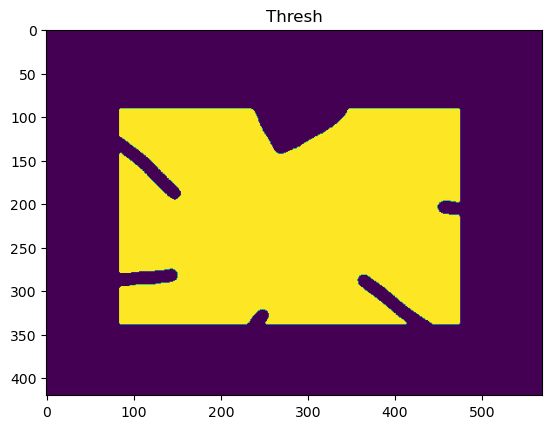

In [18]:
# convert the image to grayscale and threshold it
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)[1]
# cv2.imshow("Thresh", thresh)
show_image(thresh, "Thresh")

Since we have chosen <b>cv2.THRESH_BINARY_INV</b> as parameter, the-intensity pixels are changed to 0, while the surrounding low-intensity pixels become 255.

In [19]:
# find the largest contour in the threshold image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

original, num_pts=336


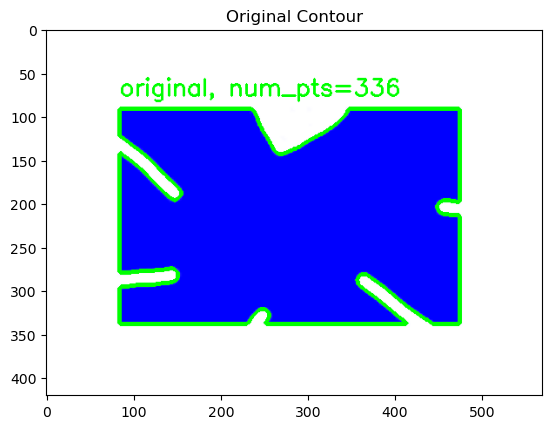

In [20]:
# draw the shape of the contour on the image
# compute the bounding box and display the number of 
# points in the contour
output = image.copy()
cv2.drawContours(output, [c], -1, (0, 255, 0), 3)
(x, y, w, h) = cv2.boundingRect(c)
text = f"original, num_pts={len(c)}"
cv2.putText(output, text, (x, y-15), cv2.FONT_HERSHEY_SIMPLEX, 0.9,
           (0, 255, 0), 2)
print(f"{text}")
show_image(output, "Original Contour")

* Using openCV's <b>findContours</b> function, we can extract all possible contours in any image.
* Here we have used <b>RETR_EXTERNAL</b>, this argument returns only single representation of available contours.
* <b>CHAIN APPROX_SIMPLE</b> removes redundant vertices in a single chain line connections.
* Finally we trace the largest contour from the list of contours and draw it on the image using <b>drawContours</b> function.
* To draw text on the image we use <b>putText</b> function.
# Contour Approximation

eps=0.0010, num_pts=46


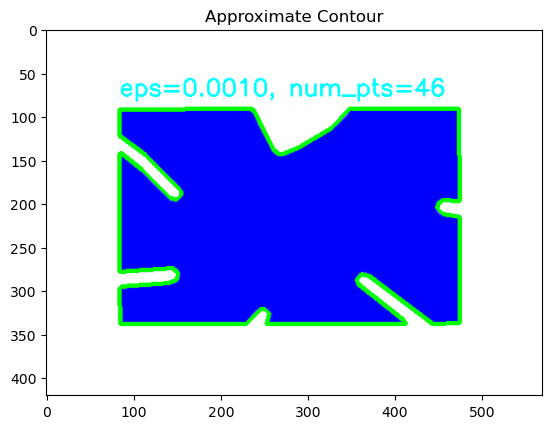

eps=0.0064, num_pts=23


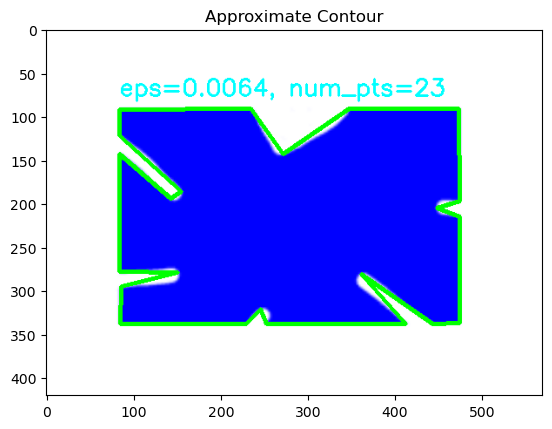

eps=0.0119, num_pts=17


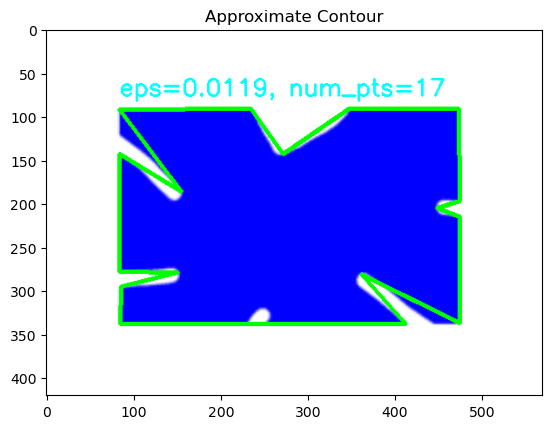

eps=0.0173, num_pts=12


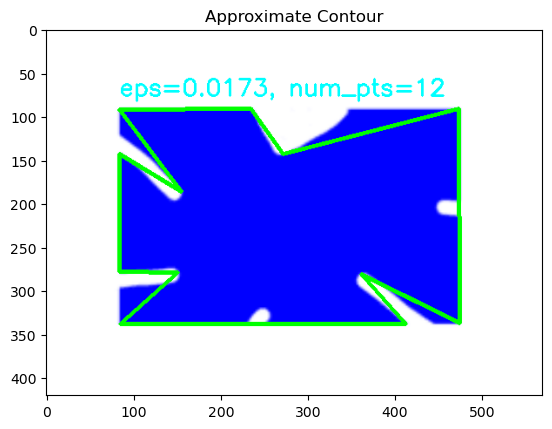

eps=0.0228, num_pts=11


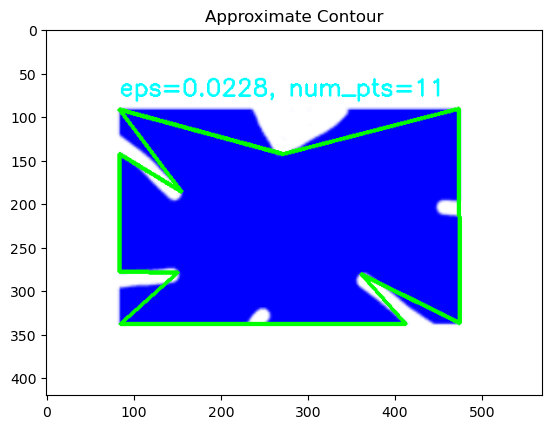

eps=0.0282, num_pts=10


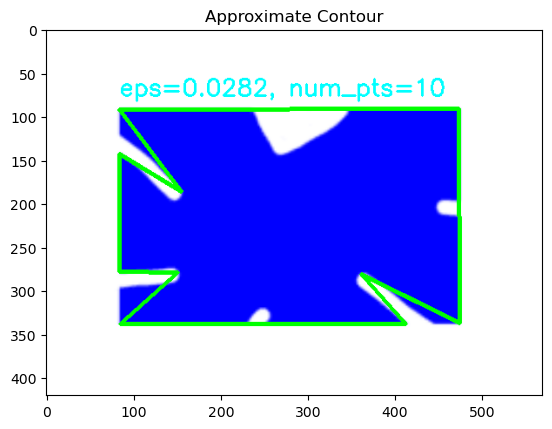

eps=0.0337, num_pts=7


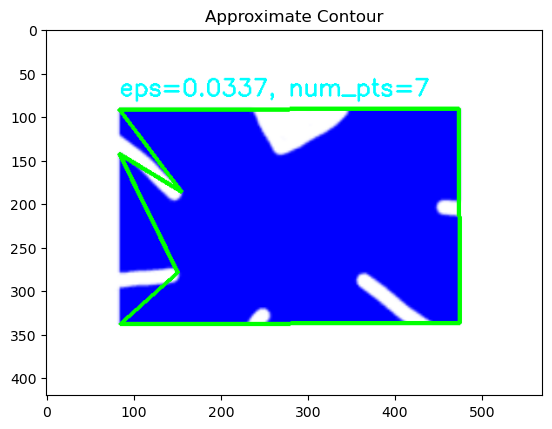

eps=0.0391, num_pts=4


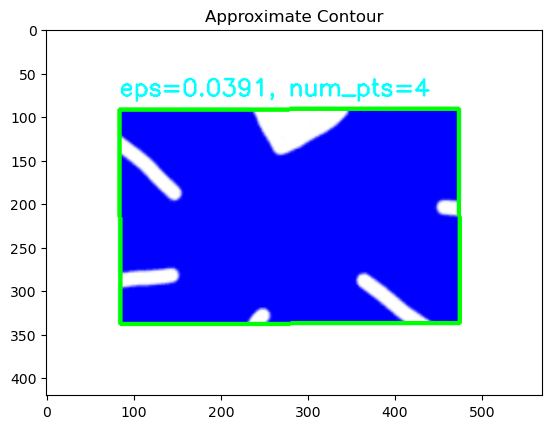

eps=0.0446, num_pts=4


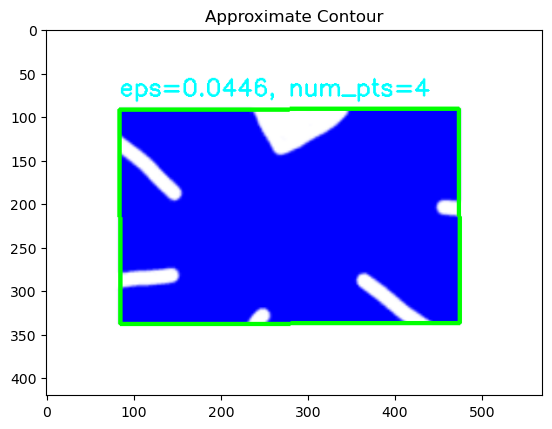

eps=0.0500, num_pts=4


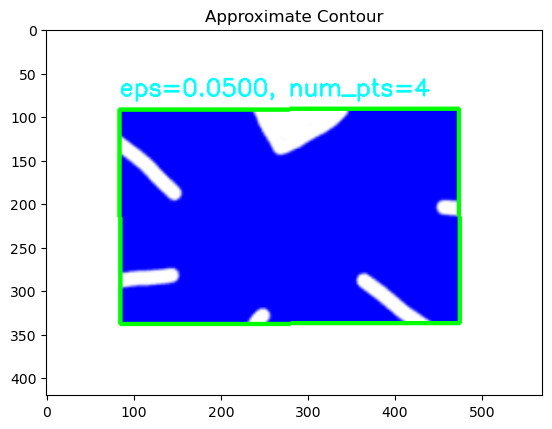

In [21]:
# let's loop over the number of epsilon sizes
for eps in np.linspace(0.001, 0.05, 10):
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, eps * peri, True)
    
    # draw the approx contour
    output = image.copy()
    cv2.drawContours(output, [approx], -1, (0, 255, 0), 3)
    text = f"eps={eps:.4f}, num_pts={len(approx)}"
    cv2.putText(output, text, (x, y-15), cv2.FONT_HERSHEY_SIMPLEX,
               0.9, (0, 255, 255), 2)
    print(text)
    show_image(output, "Approximate Contour")

* Value of epsilon will act as our threshold value to measure the vertices.
* Therefore we loop on epsilon's value over a range to feed it to contour approximation function.
* using <b>cv2.arcLength</b> we can calculate the perimeter of the contours.
* <b>cv2.approxPolyDP</b> function is used to start the contour approximation process.